# --------------Table of Contents----------------
## 1. Import libraries and data
## 2. Address any PII data in the data 
## 3. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
## 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.
## 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. '

## NOTE: See Part 2 for remainder of assignment

# -------------Questions---------------------

## 1. Import libraries and data

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Path shortcut

path = r'/Users/lynnsey/Desktop/Bootcamp/Tasks/Immersion/Task 4/07-20-2023 Instacart Basket Analysis'

In [4]:
# Import data

all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [5]:
# Check to see if imported correctly

all.head()

,order_id,user_id,order_number,orders_day_of_week,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## 2. Address any PII data in the data 

In [6]:
# Remove first & last names from dataframe

all_no_PII = all.drop(columns = ['first_name', 'last_name'])

In [7]:
# Check to make sure columns successfully dropped

all_no_PII.head()

,order_id,user_id,order_number,orders_day_of_week,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


### I dropped the first and last name columns from my dataframe so that the data can't be traced back to a specific person.

## 3. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [8]:
# Creating regional groups

region = []

for value in all_no_PII['state']: 
               if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
                   region.append('Northeast')
               elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
                   region.append('Midwest')
               elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
                   region.append('South')
               else: region.append('West')
               

In [9]:
# Inserting regional groups column into dataframe

all_no_PII['region'] = region

In [10]:
# Checking to see if inserted correctly

all_no_PII.head(20)

,order_id,user_id,order_number,orders_day_of_week,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [11]:
# Checking to see if inserted correctly

all_no_PII.tail(20)

,order_id,user_id,order_number,orders_day_of_week,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region
32404839,634152,106143,11,4,0,16.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West
32404840,1977554,106143,12,3,14,6.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West
32404841,1806098,106143,13,2,12,6.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West
32404842,131426,106143,14,6,3,4.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West
32404843,2267896,106143,15,0,1,8.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West
32404844,1987169,106143,16,6,21,6.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West
32404845,3143166,106143,17,0,8,15.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West
32404846,3094081,106143,18,4,17,11.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West
32404847,405982,106143,19,3,18,6.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West
32404848,3102310,106143,20,3,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West


In [12]:
# Checking to see if there are any missing regions

all_no_PII['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [13]:
# Checking column names

all_no_PII.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'time_ordered', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', '_merge', 'region'],
      dtype='object')

In [14]:
# Crossing spending habits with regions

spending_region = pd.crosstab(all_no_PII['region'], all_no_PII['spending_flag'], dropna = False)

In [15]:
# Copying crosstab into excel

spending_region.to_clipboard()

In [16]:
spending_region

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40564,10751321
West,31223,8261690


Text(0, 0.5, 'Number of Customers')

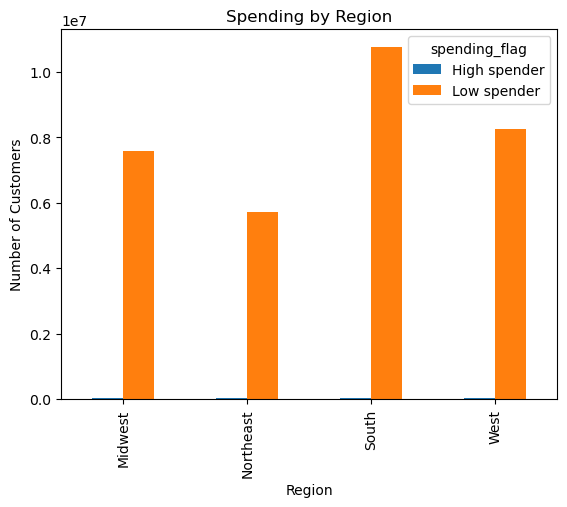

In [17]:
# Create a bar chart of region compared to spending habits

bar_spend_reg = spending_region.plot(kind="bar")
plt.title("Spending by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")

In [18]:
# Export bar chart as an image

bar_spend_reg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spend_reg_both.png'), bbox_inches='tight')

Text(0, 0.5, 'Number of High Spending Customers')

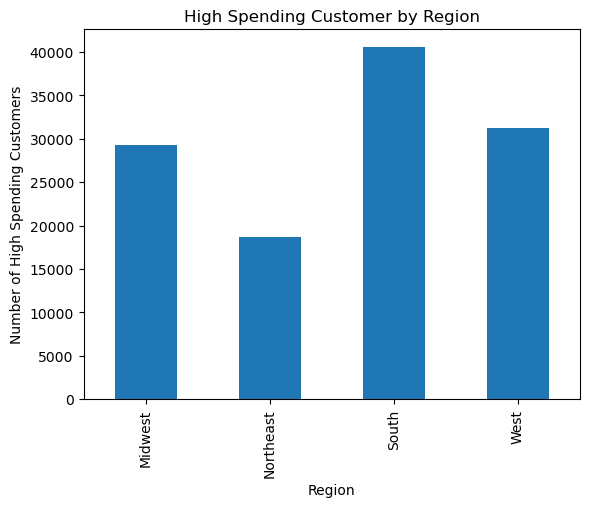

In [19]:
# Create a bar chart of just high spenders since they are barely visible due to scale of above chart

bar_high_spend_reg = spending_region['High spender'].plot(kind="bar")
plt.title("High Spending Customer by Region")
plt.xlabel("Region")
plt.ylabel("Number of High Spending Customers")

In [21]:
# Export bar chart as an image

bar_high_spend_reg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spend_reg_high.png'), bbox_inches='tight')

### Based on the two bar charts above, there is a difference in spending habits in different U.S. regions.  Both low spenders and high spenders follow the same regional pattern.  Customers in the South spend the most, followed by the West, Midwest and last, the Northeast.

## 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [20]:
# View max order column to verify this is the column that grouped users by amount of orders

all_no_PII[['user_id','max_order']].tail(50)

,user_id,max_order
32404809,11534,12
32404810,105857,6
32404811,105857,6
32404812,105857,6
32404813,105857,6
32404814,105857,6
32404815,105857,6
32404816,38979,3
32404817,38979,3
32404818,38979,3


In [21]:
# Create a new column that flags customers with under 5 orders

low_act = []

for value in all_no_PII['max_order']:
        if value < 5:
            low_act.append('low spender')
        else: low_act.append('not low spender')

In [22]:
# Add column to dataframe

all_no_PII['type_spender'] = low_act

In [23]:
# Checking to see if added correctly

all_no_PII.head()

,order_id,user_id,order_number,orders_day_of_week,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region,type_spender
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,not low spender
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,not low spender
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,not low spender
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,not low spender
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,not low spender


In [24]:
# Checking frequency of low spenders

all_no_PII['type_spender'].value_counts(dropna = False)

not low spender    30964564
low spender         1440295
Name: type_spender, dtype: int64

In [25]:
# Make a subset without low spenders

all_no_PII_no_low = all_no_PII[all_no_PII['type_spender'] == 'not low spender']

In [26]:
# Checking to see if subset was correct

all_no_PII_no_low['type_spender'].value_counts(dropna = False)

not low spender    30964564
Name: type_spender, dtype: int64

In [27]:
#Export the no low spending subset

all_no_PII_no_low.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'no_low_spender_subset.pkl'))

## 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. '

### Exploring data to see if there are patterns to profile customers

In [28]:
# Descriptive stats

all_no_PII_no_low.describe()

,order_number,orders_day_of_week,time_ordered,days_since_prior_order,add_to_cart_order,reordered,prices,max_order,mean_price,median_days_since_prior_order,age,number_of_dependants,income
count,3.096456e+07,3.096456e+07,3.096456e+07,2.930328e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.783414e+01,2.741397e+00,1.341098e+01,1.081030e+01,8.363038e+00,6.061019e-01,7.789587e+00,3.442569e+01,7.789587e+00,9.957140e+00,4.946803e+01,1.501819e+00,9.967587e+04
std,1.763442e+01,2.089254e+00,4.248845e+00,8.578590e+00,7.135399e+00,4.886127e-01,4.241015e+00,2.489504e+01,7.216592e-01,6.666137e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,9.900000e-01,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,4.200000e+00,1.400000e+01,7.383876e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,7.400000e+00,2.800000e+01,7.811437e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,1.130000e+01,4.800000e+01,8.223390e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,2.500000e+01,9.900000e+01,2.011429e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


### Determined that I need to create some new columns with grouped data.  

#### age: young <30; middle aged 30-64; mature >65
#### number of dependants: 0 or >0
#### income: low <=50,000' average 50,000-125,000; high >= 125,000
#### department: food; drinks; pets; personal care; household; babies; miscellaneous

### Once these groups have been created, I can use crosstab to see if there are any patterns so I can create my profiles.


### Creating groups based on age

In [29]:
# Create age groups column

age_gr = []

for value in all_no_PII_no_low['age']: 
               if value < 30:
                   age_gr.append('young')
               elif value in range(30,65):
                    age_gr.append('middle aged')
               elif value >= 65:
                    age_gr.append('mature')
               else: age_gr.append('not given')

In [30]:
# Adding column to dataframe

all_no_PII_no_low['age_range'] = age_gr

/var/folders/kk/6z0tdmb13cd8dwpkbrq630qw0000gn/T/ipykernel_22542/3143027708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_no_PII_no_low['age_range'] = age_gr


In [31]:
# Checking to see if added successfully

all_no_PII_no_low['age_range'].value_counts(dropna = False)

middle aged    16951417
mature          8195544
young           5817603
Name: age_range, dtype: int64

### Creating groups based on whether or not a parent

In [32]:
# Create parent column

parent_gr = []

for value in all_no_PII_no_low['number_of_dependants']: 
               if value == 0:
                   parent_gr.append('not a parent')
               else: parent_gr.append('parent')

In [33]:
# Adding column to dataframe

all_no_PII_no_low['parent'] = parent_gr

/var/folders/kk/6z0tdmb13cd8dwpkbrq630qw0000gn/T/ipykernel_22542/2301191234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_no_PII_no_low['parent'] = parent_gr


In [34]:
# Checking to see if added successfully

all_no_PII_no_low['parent'].value_counts(dropna = False)

parent          23224883
not a parent     7739681
Name: parent, dtype: int64

### Creating groups based on income

In [35]:
# Create income groups column

inc_gr = []

for value in all_no_PII_no_low['income']: 
               if value < 50000:
                   inc_gr.append('low')
               elif value in range(50000, 125000):
                    inc_gr.append('average')
               else: inc_gr.append('high')

In [36]:
# Adding column to dataframe

all_no_PII_no_low['income_range'] = inc_gr

/var/folders/kk/6z0tdmb13cd8dwpkbrq630qw0000gn/T/ipykernel_22542/3195476200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_no_PII_no_low['income_range'] = inc_gr


In [37]:
# Checking to see if added successfully

all_no_PII_no_low['income_range'].value_counts(dropna = False)

average    19323966
high        8278044
low         3362554
Name: income_range, dtype: int64

### Creating groups based on departments

In [38]:
# Creating department groups

dept = []

for value in all_no_PII_no_low['department_id']: 
               if value == '18':
                   dept.append('babies')
               elif value in ['5', '7']:
                   dept.append('drinks')
               elif value in ['1', '3', '4', '6', '9', '12', '13', '14', '15', '16', '19', '20']:
                   dept.append('food')
               elif value in ['17']:
                   dept.append('household')
               elif value in ['2', '10', '21']:
                   dept.append('misc')
               elif value == '11':
                   dept.append('personal care')
               elif value == '8':
                    dept.append('pets')
               

In [39]:
# Adding column to dataframe

all_no_PII_no_low['department_group'] = dept

/var/folders/kk/6z0tdmb13cd8dwpkbrq630qw0000gn/T/ipykernel_22542/3594388649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_no_PII_no_low['department_group'] = dept


In [40]:
# Checking to see if added successfully

all_no_PII_no_low['department_group'].value_counts(dropna = False)

food             26487791
drinks            2716528
household          699857
personal care      424306
babies             410392
misc               132630
pets                93060
Name: department_group, dtype: int64

### I created different groups for each variable above so that now I can see if they are any logical groupings

### Creating a subset of the data so that I can create some visualizations.  I tried without a subset and it took a long time.

In [41]:
# Create a sample of the population

# Create a list holding True/False values to the test np.random.rant() <+ 0.7

np.random.seed(4)
dev = np.random.rand(len(all_no_PII_no_low)) <= 0.7

In [42]:
# Store 70% of the sample in the dataframe big

big = all_no_PII_no_low[dev]

In [43]:
# Store 30% of the sample in the data frame small

small = all_no_PII_no_low[~dev]

In [44]:
# Check numbers to see if they are correct

len(all_no_PII_no_low)

30964564

In [45]:
len(big) + len(small)

30964564

### Doing some visualizations on my dataframe using the subset

#### Creating a bar chart comparing age_group to income to see if there's a relationship I can create a profile out of.

In [47]:
# Only including the relevant columns

df = small[['age_range','income']]

KeyboardInterrupt: 

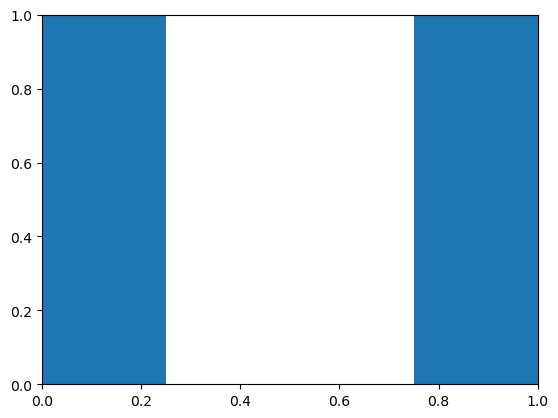

In [49]:
df.plot.bar(x = 'age_range', y = 'income')

### Even after making a subset it's taking a long time to create a visual.  So I'm going to export my dataframes and create a new notebook just using the small subset.

In [51]:
# Export entire dataframe

all_no_PII_no_low.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged_V2.pkl'))

In [52]:
# Export small subset of data

small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'small_subset_all.pkl'))

In [50]:
# Export big subset of data

big.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'large_subset_all.pkl'))

# See Task 4.10 Part 2 for rest of work